# Opals

Explore performance of Opals players using WNBL data
 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import wnbl

data_path = "..\\data"

In [2]:
opals_df = wnbl.load_csv(data_path,'opals.csv')

In [4]:
opals_df.head()

,Name,Team,DOB,Height,Position,Comp
0,Rebecca Allen,NY Liberty,6/11/1992,1.85,F,WNBA
1,Sara Blicavs,Southside Flyers,15/02/1993,1.88,F,WNBL
2,Elizabeth Cambage,Southside Flyers,18/08/1991,2.03,C,WNBL
3,Rebecca Cole,Southside Flyers,19/03/1992,1.78,G,WNBL
4,Katie Ebzery,Perth Lynx,8/01/1990,1.78,G,WNBL


In [5]:
# concatenate all teams by season info, drop duplicates to define unique TeamID and name mapping
# select files prefixed with "teams" in "teams" subfolder
teams_df = wnbl.load_csv(os.path.join(data_path,'teams'),'teams')
teams_df = teams_df.drop_duplicates().reset_index()
teams_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   index   25 non-null     int64 
 1   Team    25 non-null     object
 2   TeamID  25 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 728.0+ bytes


In [6]:
# concatenate all players by season stats
players_df = wnbl.load_csv(os.path.join(data_path,'players'),'players',include_id=True)

# fix html encoded apostrophes iin names
players_df['Player'] = players_df['Player'].str.replace("&#039;","'")
players_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3004 entries, 0 to 105
Data columns (total 21 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Player  3004 non-null   object 
 1   G       3004 non-null   int64  
 2   PTS     3004 non-null   int64  
 3   FGA     3004 non-null   int64  
 4   FGM     3004 non-null   int64  
 5   FG%     3004 non-null   float64
 6   3PA     3004 non-null   int64  
 7   3PM     3004 non-null   int64  
 8   3P%     3004 non-null   float64
 9   FTA     3004 non-null   int64  
 10  FTM     3004 non-null   int64  
 11  FT%     3004 non-null   float64
 12  DEF     3004 non-null   int64  
 13  OFF     3004 non-null   int64  
 14  REB     3004 non-null   int64  
 15  AST     3004 non-null   int64  
 16  BLK     3004 non-null   int64  
 17  STL     3004 non-null   int64  
 18  TO      3004 non-null   int64  
 19  TeamID  3004 non-null   int64  
 20  CompID  3004 non-null   int32  
dtypes: float64(3), int32(1), int64(16), ob

In [7]:
# load seasons (maps year to competition)
# seasons_df = pd.read_csv(os.path.join(data_path,'seasons.csv'))
seasons_df = wnbl.load_csv(data_path,'seasons.csv')

# identify current seasons
comp_id = seasons_df['CompID'].max()

In [8]:
seasons_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26 entries, 0 to 25
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Season  26 non-null     object
 1   Year    26 non-null     int64 
 2   URL     26 non-null     object
 3   CompID  26 non-null     int64 
dtypes: int64(2), object(2)
memory usage: 960.0+ bytes


In [9]:
print(players_df.shape)
print(seasons_df.shape)
print(teams_df.shape)
print(opals_df.shape)

(3004, 21)
(26, 4)
(25, 3)
(23, 6)


In [10]:
# merge players and seasons so we can plot by date
players_df = players_df.merge(seasons_df,on='CompID',how='left')

In [11]:
players_df = players_df.merge(teams_df,on='TeamID',how='left')
# players_df = players_df.rename(columns={'Team_y':'Team'})

In [12]:
# New features
da = players_df

# efficiency
da['EFF'] = da['PTS'] + da['REB'] + da['AST'] + da['STL'] + da['BLK'] - (da['FGA'] - da['FGM']) - (da['3PA'] - da['3PM'])  - (da['FTA'] - da['FTM']) - da['TO']

# efficiency per game
da['EPG'] = da['EFF'] / da['G']

In [13]:
players_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3004 entries, 0 to 3003
Data columns (total 28 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Player  3004 non-null   object 
 1   G       3004 non-null   int64  
 2   PTS     3004 non-null   int64  
 3   FGA     3004 non-null   int64  
 4   FGM     3004 non-null   int64  
 5   FG%     3004 non-null   float64
 6   3PA     3004 non-null   int64  
 7   3PM     3004 non-null   int64  
 8   3P%     3004 non-null   float64
 9   FTA     3004 non-null   int64  
 10  FTM     3004 non-null   int64  
 11  FT%     3004 non-null   float64
 12  DEF     3004 non-null   int64  
 13  OFF     3004 non-null   int64  
 14  REB     3004 non-null   int64  
 15  AST     3004 non-null   int64  
 16  BLK     3004 non-null   int64  
 17  STL     3004 non-null   int64  
 18  TO      3004 non-null   int64  
 19  TeamID  3004 non-null   int64  
 20  CompID  3004 non-null   int32  
 21  Season  3004 non-null   object 
 22  

In [14]:
opals_data_df = pd.merge(da,opals_df,left_on='Player',right_on='Name')
opals_data_df.drop(columns=['Name','Team_y'],inplace=True)
opals_data_df.rename(columns={'Team_x':'Team'},inplace=True)
opals_data_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 158 entries, 0 to 157
Data columns (total 32 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Player    158 non-null    object 
 1   G         158 non-null    int64  
 2   PTS       158 non-null    int64  
 3   FGA       158 non-null    int64  
 4   FGM       158 non-null    int64  
 5   FG%       158 non-null    float64
 6   3PA       158 non-null    int64  
 7   3PM       158 non-null    int64  
 8   3P%       158 non-null    float64
 9   FTA       158 non-null    int64  
 10  FTM       158 non-null    int64  
 11  FT%       158 non-null    float64
 12  DEF       158 non-null    int64  
 13  OFF       158 non-null    int64  
 14  REB       158 non-null    int64  
 15  AST       158 non-null    int64  
 16  BLK       158 non-null    int64  
 17  STL       158 non-null    int64  
 18  TO        158 non-null    int64  
 19  TeamID    158 non-null    int64  
 20  CompID    158 non-null    int32 

In [15]:
# filter by current season to identify current team for each player
tmp = opals_data_df[['Player','Team','CompID']]

tmp = tmp[tmp['CompID']==comp_id]

# identify current team for these top players
current_teams = tmp[['Player','Team']]


In [16]:
tmp = opals_data_df[['Player','Team','CompID']]

a = tmp.groupby(['Player'], sort=False)['CompID'].max()
a

Player
Darcee Garbin        28356
Cayla George         28356
Tessa Lavey          28356
Sami Whitcomb        18335
Sara Blicavs         28356
Rebecca Allen         1820
Shyla Heal           28356
Katie Ebzery         28356
Kelsey Griffin       28356
Leilani Mitchell     28356
Tess Madgen          28356
Stephanie Talbot     28356
Elizabeth Cambage    28356
Rebecca Cole         28356
Jenna O'Hea          28356
Maddison Rocci       28356
Marianna Tolo        28356
Name: CompID, dtype: int32

In [17]:
# concatenate current team with player
tmp = opals_data_df[['Player','Team','Year','EPG','Position','Height']]
tmp = tmp.merge(current_teams,on='Player')
tmp['Player-Team'] = tmp['Player'] + ' (' + tmp['Team_y'] + ') ' + '\n Pos: ' + tmp['Position'] + ' '+ ' Height: ' + tmp['Height'].astype('str') + ' '


In [18]:
# order player positions
t = pd.CategoricalDtype(categories=['G', 'F','C'], ordered=True)
tmp['sort']=pd.Series(tmp.Position, dtype=t)
tmp.sort_values(by=['sort','Player','Height'],ascending=[True,True,True],ignore_index=True,inplace=True)

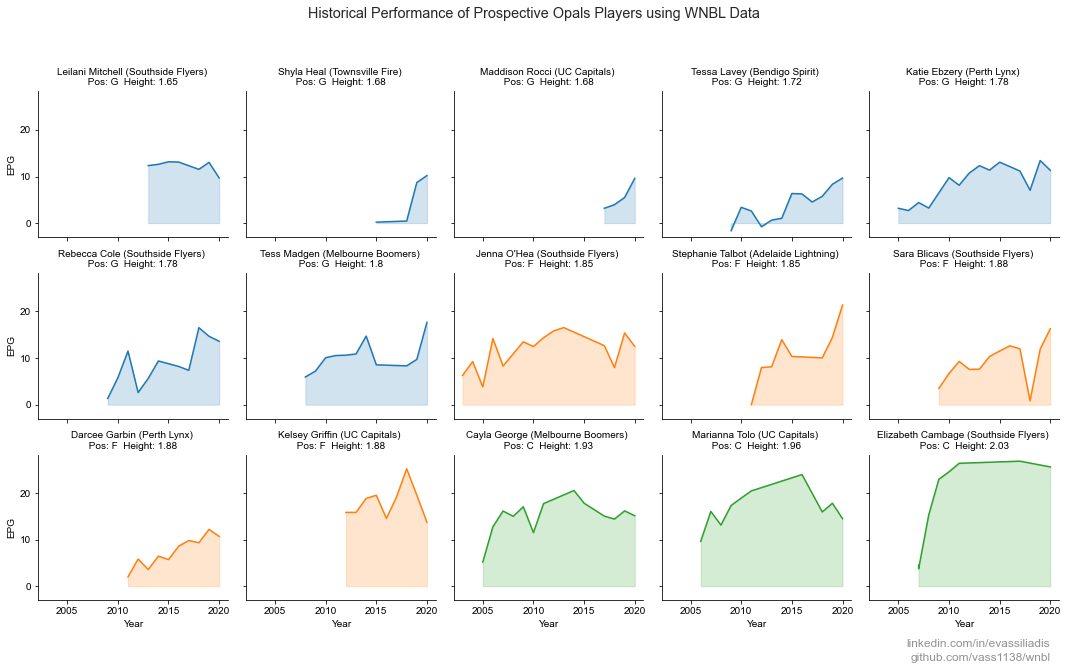

In [19]:
# facet plot of top player historial EPG

# Create a grid : initialize it
g = sns.FacetGrid(tmp.sort_values(by=['sort','Height','Year']), col='Player-Team', hue='Position', col_wrap=5)
 
# Add the line over the area with the plot function
g = g.map(plt.plot, 'Year', 'EPG')
 
# Fill the area with fill_between
g = g.map(plt.fill_between, 'Year', 'EPG', alpha=0.2).set_titles("{col_name} Player-Team")
 
# Control the title of each facet
g = g.set_titles("{col_name}")
 
# Add a title for the whole plot
plt.subplots_adjust(top=0.85)
sns.set(rc={'figure.figsize':(12,8)})
g = g.fig.suptitle('Historical Performance of Prospective Opals Players using WNBL Data')

plt.text(2020,-13,"linkedin.com/in/evassiliadis",ha='right',alpha=0.5)
plt.text(2020,-16,"github.com/vass1138/wnbl",ha='right',alpha=0.5)
plt.savefig('wnbl_opals_history.png')
plt.show()

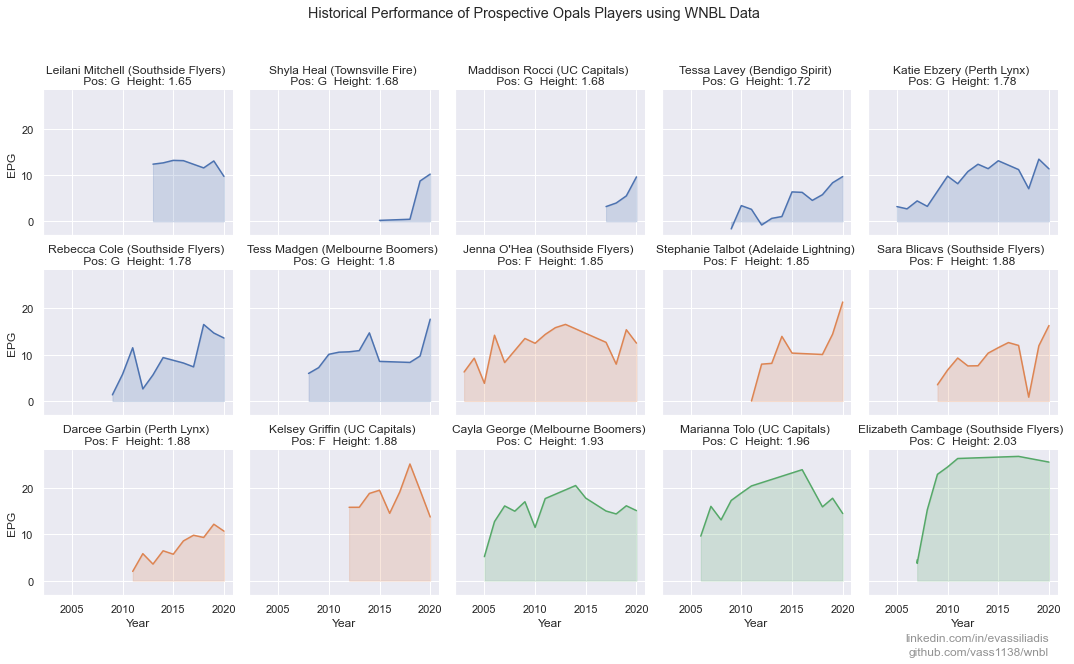

In [21]:
# Repeat for Twitter

# facet plot of top player historial EPG

# Create a grid : initialize it
g = sns.FacetGrid(tmp.sort_values(by=['sort','Height','Year']), col='Player-Team', hue='Position', col_wrap=5)
 
# Add the line over the area with the plot function
g = g.map(plt.plot, 'Year', 'EPG')
 
# Fill the area with fill_between
g = g.map(plt.fill_between, 'Year', 'EPG', alpha=0.2).set_titles("{col_name} Player-Team")
 
# Control the title of each facet
g = g.set_titles("{col_name}")
 
# Add a title for the whole plot
plt.subplots_adjust(top=0.85)
sns.set(rc={'figure.figsize':(12,6)})
g = g.fig.suptitle('Historical Performance of Prospective Opals Players using WNBL Data')

plt.text(2020,-13,"linkedin.com/in/evassiliadis",ha='right',alpha=0.5)
plt.text(2020,-16,"github.com/vass1138/wnbl",ha='right',alpha=0.5)
plt.savefig('wnbl_opals_history_twitter.png')

# Non WNBL players (WNBA NCAA) - in progress

In [ ]:
wnba_df = opals_df[opals_df['Comp']=='WNBA']
wnba_df

In [ ]:
pd.merge(players_df,wnba_df,left_on='Player',right_on='Name')

In [ ]:
wnba_df